In [1]:
import pandas as pd
import numpy as np

In [2]:
# 그래프에서 한글폰트 지원
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [3]:
pay=pd.read_csv('data/서울시 상권분석서비스(소득소비-행정동).csv', encoding='cp949')

In [4]:
road=pd.read_csv('data/서울시 상권분석서비스(길단위인구-행정동).csv', encoding='cp949')

In [5]:
worker=pd.read_csv('data/서울시 상권분석서비스(직장인구-행정동).csv', encoding='cp949')

In [6]:
money=pd.read_csv('data/서울시_상권분석서비스(추정매출-행정동)_2022년.csv', encoding='cp949')

In [7]:
shop=pd.read_csv('data/서울시 상권분석서비스(점포-행정동).csv', encoding='cp949')

In [8]:
home=pd.read_csv('data/서울시 상권분석서비스(상주인구-행정동).csv', encoding='cp949')

In [9]:
pd.DataFrame(road).isnull().sum()

기준_년분기_코드           0
행정동_코드              0
행정동_코드_명            0
총_유동인구_수            0
남성_유동인구_수           0
여성_유동인구_수           0
연령대_10_유동인구_수       0
연령대_20_유동인구_수       0
연령대_30_유동인구_수       0
연령대_40_유동인구_수       0
연령대_50_유동인구_수       0
연령대_60_이상_유동인구_수    0
시간대_00_06_유동인구_수    0
시간대_06_11_유동인구_수    0
시간대_11_14_유동인구_수    0
시간대_14_17_유동인구_수    0
시간대_17_21_유동인구_수    0
시간대_21_24_유동인구_수    0
월요일_유동인구_수          0
화요일_유동인구_수          0
수요일_유동인구_수          0
목요일_유동인구_수          0
금요일_유동인구_수          0
토요일_유동인구_수          0
일요일_유동인구_수          0
dtype: int64

### 22년도 데이터 추출

In [10]:
worker1 = worker[worker['기준_년분기_코드'].isin([20221, 20222, 20223, 20224])]
road1 = road[road['기준_년분기_코드'].isin([20221, 20222, 20223, 20224])]
shop1 = shop[shop['기준_년분기_코드'].isin([20221, 20222, 20223, 20224])]
pay1 = pay[pay['기준_년분기_코드'].isin([20221, 20222, 20223, 20224])]
money1 = money[money['기준_년분기_코드'].isin([20221, 20222, 20223, 20224])]
home1 = home[home['기준_년분기_코드'].isin([20221, 20222, 20223, 20224])]

### 인구데이터 별 TOP5 씩 추출

In [11]:
# 인구 데이터 중 비교적 최근인 2022년4분기 데이터 추출하여 사용
worker2 = worker[worker['기준_년분기_코드'].isin([20224])]
road2 = road[road['기준_년분기_코드'].isin([20224])]
home2 = home[home['기준_년분기_코드'].isin([20224])]

In [12]:
worker2[worker2['행정동_코드_명'] == '여의동']

,기준_년분기_코드,행정동_코드,행정동_코드_명,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,연령대_20_직장_인구_수,연령대_30_직장_인구_수,연령대_40_직장_인구_수,...,남성연령대_30_직장_인구_수,남성연령대_40_직장_인구_수,남성연령대_50_직장_인구_수,남성연령대_60_이상_직장_인구_수,여성연령대_10_직장_인구_수,여성연령대_20_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수,여성연령대_50_직장_인구_수,여성연령대_60_이상_직장_인구_수
7317,20224,11560540,여의동,217817,154569,63248,520,40050,78066,55998,...,55804,43252,26581,6628,325,17941,22262,12746,6815,3159


In [13]:
# 행정동 이름으로 인덱스 변경
worker2.set_index(['행정동_코드_명'], inplace=True)
road2.set_index(['행정동_코드_명'], inplace=True)
home2.set_index(['행정동_코드_명'], inplace=True)

### 인구 데이터 별 TOP10 행정동 추출

In [14]:
worker2['총_직장_인구_수'].nlargest(10)

행정동_코드_명
여의동            217817
도곡2동           192577
역삼1동           170825
삼성1동           130157
종로1?2?3?4가동     97451
반포4동            94714
대치2동            92377
가산동             84451
문래동             81647
소공동             77533
Name: 총_직장_인구_수, dtype: int64

In [15]:
road2['총_유동인구_수'].nlargest(10)

행정동_코드_명
역삼1동           21577405
서교동            17759583
북아현동           17582013
길동             16941692
화곡1동           16707796
공덕동            14866522
종로1?2?3?4가동    14211700
용신동            13996313
송천동            12737853
제기동            12720943
Name: 총_유동인구_수, dtype: int64

In [16]:
home2['총_상주인구_수'].nlargest(10)

행정동_코드_명
화곡1동    51684
진관동     50293
역촌동     48771
양재1동    47758
신정3동    47275
길동      46207
상도1동    46157
우장산동    46018
목5동     44710
방화1동    44245
Name: 총_상주인구_수, dtype: int64

### TOP5의 필요한 성별, 연령대 데이터 추출

In [17]:
worker3 = worker2[['연령대_10_직장_인구_수', '연령대_20_직장_인구_수',	
'연령대_30_직장_인구_수', '연령대_40_직장_인구_수', '연령대_50_직장_인구_수','연령대_60_이상_직장_인구_수']]

In [18]:
home3 = home2[['연령대_10_상주인구_수', '연령대_20_상주인구_수',	
'연령대_30_상주인구_수', '연령대_40_상주인구_수', '연령대_50_상주인구_수','연령대_60_이상_상주인구_수']]

In [19]:
road3 = road2[['시간대_00_06_유동인구_수',
       '시간대_06_11_유동인구_수', '시간대_11_14_유동인구_수', '시간대_14_17_유동인구_수',
       '시간대_17_21_유동인구_수', '시간대_21_24_유동인구_수', '월요일_유동인구_수', '화요일_유동인구_수',
       '수요일_유동인구_수', '목요일_유동인구_수', '금요일_유동인구_수', '토요일_유동인구_수', '일요일_유동인구_수']]

### 2022년 4분기 총 직장인구 대비 행정동 TOP5의 비율 추출

In [20]:
# 잘못 표시된 종로1?2?3?4가동을 종로 1.2.3.4가동으로 이름 변경 
worker2.rename(index={'종로1?2?3?4가동':'종로1.2.3.4가동'}, inplace=True)
worker3.rename(index={'종로1?2?3?4가동':'종로1.2.3.4가동'}, inplace=True)
worker2.loc['종로1.2.3.4가동']

C:\Users\gillhk\AppData\Local\Temp\ipykernel_23188\328031423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  worker2.rename(index={'종로1?2?3?4가동':'종로1.2.3.4가동'}, inplace=True)
C:\Users\gillhk\AppData\Local\Temp\ipykernel_23188\328031423.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  worker3.rename(index={'종로1?2?3?4가동':'종로1.2.3.4가동'}, inplace=True)


기준_년분기_코드                 20224
행정동_코드                 11110615
총_직장_인구_수                 97451
남성_직장_인구_수                53687
여성_직장_인구_수                43764
연령대_10_직장_인구_수             1427
연령대_20_직장_인구_수            19755
연령대_30_직장_인구_수            29598
연령대_40_직장_인구_수            26670
연령대_50_직장_인구_수            15288
연령대_60_이상_직장_인구_수          4713
남성연령대_10_직장_인구_수            620
남성연령대_20_직장_인구_수           8610
남성연령대_30_직장_인구_수          14862
남성연령대_40_직장_인구_수          15621
남성연령대_50_직장_인구_수          10763
남성연령대_60_이상_직장_인구_수        3211
여성연령대_10_직장_인구_수            807
여성연령대_20_직장_인구_수          11145
여성연령대_30_직장_인구_수          14736
여성연령대_40_직장_인구_수          11049
여성연령대_50_직장_인구_수           4525
여성연령대_60_이상_직장_인구_수        1502
Name: 종로1.2.3.4가동, dtype: int64

In [21]:
# 직장인구 TOP1 여의동의 2022년 4분기 총 직장인구 대비 비율 -> 4.5%
round(worker2.loc['여의동']['총_직장_인구_수'] / worker2['총_직장_인구_수'].sum() * 100,1)

4.5

In [22]:
# 직장인구 TOP2 도곡2동의 2022년 4분기 총 직장인구 대비 비율 -> 4.0%
round(worker2.loc['도곡2동']['총_직장_인구_수'] / worker2['총_직장_인구_수'].sum() * 100,1)

4.0

In [23]:
# 직장인구 TOP3 역삼1동의 2022년 4분기 총 직장인구 대비 비율 -> 3.6%
round(worker2.loc['역삼1동']['총_직장_인구_수'] / worker2['총_직장_인구_수'].sum() * 100,1)

3.6

In [24]:
# 직장인구 TOP4 삼성1동의 2022년 4분기 총 직장인구 대비 비율 -> 2.7%
round(worker2.loc['삼성1동']['총_직장_인구_수'] / worker2['총_직장_인구_수'].sum() * 100,1)

2.7

In [25]:
# 직장인구 TOP5 종로1.2.3.4가동의 2022년 4분기 총 직장인구 대비 비율 -> 2.0%
round(worker2.loc['종로1.2.3.4가동']['총_직장_인구_수'] / worker2['총_직장_인구_수'].sum() * 100,1)

2.0

### 2022년 총 상주인구 대비 행정동 TOP5의 비율 추출

In [26]:
# 상주인구 TOP1 화곡1동의 2022년 4분기 총 상주인구 대비 비율 -> 0.55%
round(home2.loc['화곡1동']['총_상주인구_수'] / home2['총_상주인구_수'].sum() * 100,2)

0.55

In [27]:
# 상주인구 TOP2 진관동의 2022년 4분기 총 상주인구 대비 비율 -> 0.53%
round(home2.loc['진관동']['총_상주인구_수'] / home2['총_상주인구_수'].sum() * 100,2)

0.53

In [28]:
# 상주인구 TOP3 역촌동의 2022년 4분기 총 상주인구 대비 비율 -> 0.52%
round(home2.loc['역촌동']['총_상주인구_수'] / home2['총_상주인구_수'].sum() * 100,2)

0.52

In [29]:
# 상주인구 TOP4 양재1동의 2022년 4분기 총 상주인구 대비 비율 -> 0.51%
round(home2.loc['양재1동']['총_상주인구_수'] / home2['총_상주인구_수'].sum() * 100,2)

0.51

In [30]:
# 상주인구 TOP5 신정3동의 2022년 4분기 총 상주인구 대비 비율 -> 0.5%
round(home2.loc['신정3동']['총_상주인구_수'] / home2['총_상주인구_수'].sum() * 100,2)

0.5

### 2022년 총 유동인구 대비 행정동 TOP5의 비율 추출

In [31]:
# 유동인구 TOP1 역삼1동의 2022년 4분기 총 유동인구 대비 비율 -> 0.91%
round(road2.loc['역삼1동']['총_유동인구_수'] / road2['총_유동인구_수'].sum() * 100,2)

0.91

In [32]:
# 유동인구 TOP2 서교동의 2022년 4분기 총 유동인구 대비 비율 -> 0.75%
round(road2.loc['서교동']['총_유동인구_수'] / road2['총_유동인구_수'].sum() * 100,2)

0.75

In [33]:
# 유동인구 TOP3 북아현동의 2022년 4분기 총 유동인구 대비 비율 -> 0.75%
round(road2.loc['북아현동']['총_유동인구_수'] / road2['총_유동인구_수'].sum() * 100,2)

0.75

In [34]:
# 유동인구 TOP4 길동의 2022년 4분기 총 유동인구 대비 비율 -> 0.72%
round(road2.loc['길동']['총_유동인구_수'] / road2['총_유동인구_수'].sum() * 100,2)

0.72

In [35]:
# 유동인구 TOP5 화곡1동의 2022년 4분기 총 유동인구 대비 비율 -> 0.71%
round(road2.loc['화곡1동']['총_유동인구_수'] / road2['총_유동인구_수'].sum() * 100,2)

0.71

### 인구 데이터 별 TOP5 행정동 세부 인구분석

#### 직장인구 TOP5 (여의동, 도곡2동, 역삼1동, 삼성1동, 종로1.2.3.4가동)

In [36]:
# 보기 좋게 컬럼이름변경
worker3.rename(columns={'연령대_10_직장_인구_수': '10대', '연령대_20_직장_인구_수':'20대',	
'연령대_30_직장_인구_수':'30대', '연령대_40_직장_인구_수':'40대', '연령대_50_직장_인구_수':'50대','연령대_60_이상_직장_인구_수':'60대 이상'}, inplace=True)

C:\Users\gillhk\AppData\Local\Temp\ipykernel_23188\3711962039.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  worker3.rename(columns={'연령대_10_직장_인구_수': '10대', '연령대_20_직장_인구_수':'20대',


In [37]:
# 보기 좋게 컬럼이름변경
home3.rename(columns={'연령대_10_상주인구_수': '10대', '연령대_20_상주인구_수':'20대',	
'연령대_30_상주인구_수':'30대', '연령대_40_상주인구_수':'40대', '연령대_50_상주인구_수':'50대','연령대_60_이상_상주인구_수':'60대 이상'}, inplace=True)

C:\Users\gillhk\AppData\Local\Temp\ipykernel_23188\2021429579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home3.rename(columns={'연령대_10_상주인구_수': '10대', '연령대_20_상주인구_수':'20대',


In [38]:
# 보기 좋게 컬럼이름변경
road3.rename(columns={'시간대_00_06_유동인구_수':'00~06',
       '시간대_06_11_유동인구_수':'06~11', '시간대_11_14_유동인구_수':'11~14', '시간대_14_17_유동인구_수':'14~17',
       '시간대_17_21_유동인구_수':'17~21', '시간대_21_24_유동인구_수':'21~24', '월요일_유동인구_수':'월요일', 
                      '화요일_유동인구_수':'화요일', '수요일_유동인구_수':'수요일', '목요일_유동인구_수':'목요일', 
                      '금요일_유동인구_수':'금요일', '토요일_유동인구_수':'토요일', '일요일_유동인구_수':'일요일'}, inplace=True)

C:\Users\gillhk\AppData\Local\Temp\ipykernel_23188\778168339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  road3.rename(columns={'시간대_00_06_유동인구_수':'00~06',


In [39]:
road3.columns

Index(['00~06', '06~11', '11~14', '14~17', '17~21', '21~24', '월요일', '화요일',
       '수요일', '목요일', '금요일', '토요일', '일요일'],
      dtype='object')

In [40]:
road4 = road3[['00~06', '06~11', '11~14', '14~17', '17~21', '21~24']]
road5 = road3[['월요일', '화요일','수요일', '목요일', '금요일', '토요일', '일요일']]

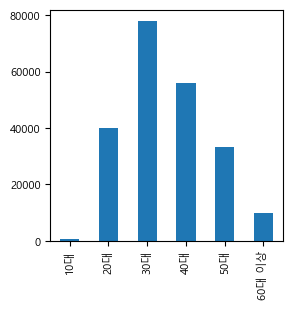

In [41]:
# 여의동 연령 별 직장 인구수
worker3.loc['여의동'].plot.bar(figsize=(3,3), fontsize=8)
plt.show()

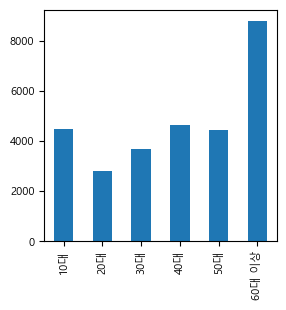

In [42]:
# 여의동 연령 별 상주 인구수
home3.loc['여의동'].plot.bar(figsize=(3,3), fontsize=8)
plt.show()

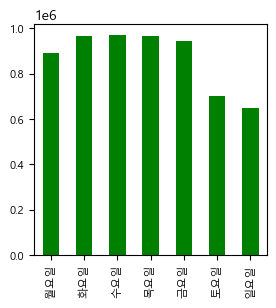

In [43]:
# 여의동 요일 별 유동 인구수
road5.loc['여의동'].plot.bar(figsize=(3,3), fontsize=8, color='g')
plt.show()

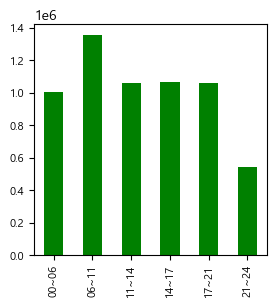

In [44]:
# 여의동 시간 별 유동 인구수
road4.loc['여의동'].plot.bar(figsize=(3,3), fontsize=8, color='g')
plt.show()

#### 유동인구 TOP5 (역삼1동, 서교동, 북아현동, 길동, 화곡1동)

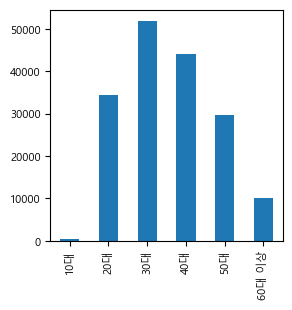

In [45]:
# 역삼1동 연령 별 직장 인구수
worker3.loc['역삼1동'].plot.bar(figsize=(3,3), fontsize=8)
plt.show()

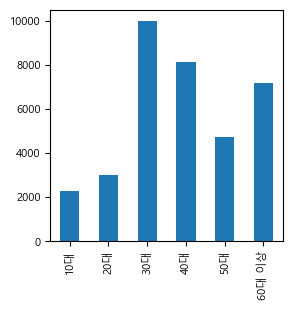

In [46]:
# 역삼1동 연령 별 상주 인구수
home3.loc['역삼1동'].plot.bar(figsize=(3,3), fontsize=8)
plt.show()

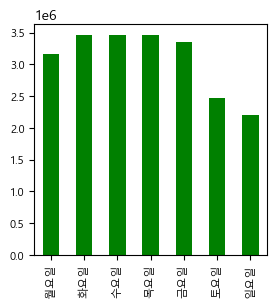

In [47]:
# 역삼1동 요일 별 유동 인구수
road5.loc['역삼1동'].plot.bar(figsize=(3,3), fontsize=8, color='g')
plt.show()

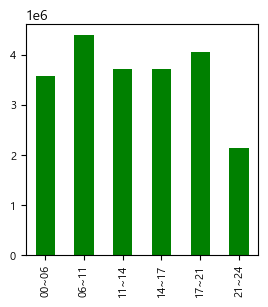

In [48]:
# 역삼1동 시간 별 유동 인구수
road4.loc['역삼1동'].plot.bar(figsize=(3,3), fontsize=8, color='g')
plt.show()

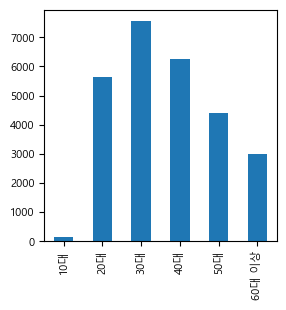

In [49]:
# 서교동 연령 별 직장 인구수
worker3.loc['서교동'].plot.bar(figsize=(3,3), fontsize=8)
plt.show()

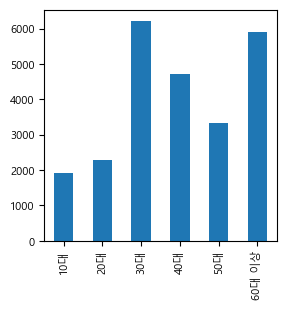

In [50]:
# 서교동 연령 별 상주 인구수
home3.loc['서교동'].plot.bar(figsize=(3,3), fontsize=8)
plt.show()

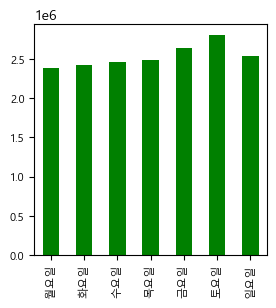

In [51]:
# 서교동 요일 별 유동 인구수
road5.loc['서교동'].plot.bar(figsize=(3,3), fontsize=8, color='g')
plt.show()

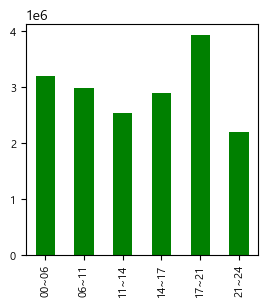

In [52]:
# 서교동 시간 별 유동 인구수
road4.loc['서교동'].plot.bar(figsize=(3,3), fontsize=8, color='g')
plt.show()

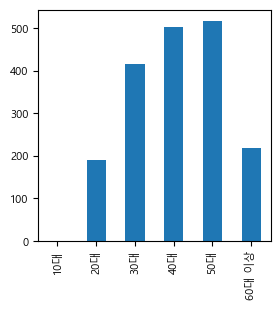

In [53]:
# 북아현동 연령 별 직장 인구수
worker3.loc['북아현동'].plot.bar(figsize=(3,3), fontsize=8)
plt.show()

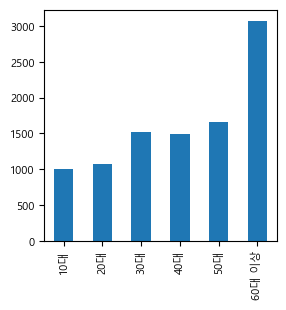

In [54]:
# 북아현동 연령 별 상주 인구수
home3.loc['북아현동'].plot.bar(figsize=(3,3), fontsize=8)
plt.show()

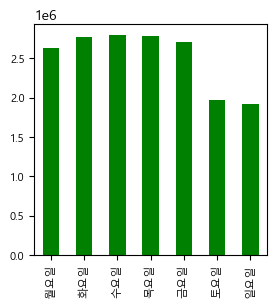

In [55]:
# 북아현동 요일 별 유동 인구수
road5.loc['북아현동'].plot.bar(figsize=(3,3), fontsize=8, color='g')
plt.show()

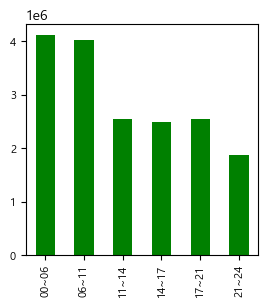

In [56]:
# 북아현동 시간 별 유동 인구수
road4.loc['북아현동'].plot.bar(figsize=(3,3), fontsize=8, color='g')
plt.show()

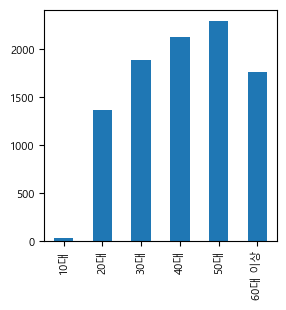

In [57]:
# 길동 연령 별 직장 인구수
worker3.loc['길동'].plot.bar(figsize=(3,3), fontsize=8)
plt.show()

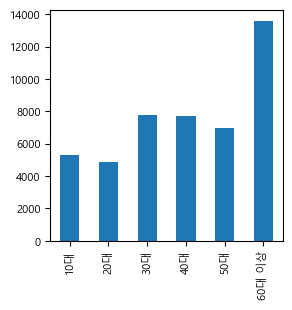

In [58]:
# 길동 연령 별 상주 인구수
home3.loc['길동'].plot.bar(figsize=(3,3), fontsize=8)
plt.show()

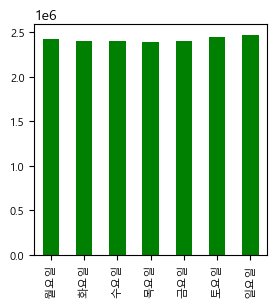

In [59]:
# 길동 요일 별 유동 인구수
road5.loc['길동'].plot.bar(figsize=(3,3), fontsize=8, color='g')
plt.show()

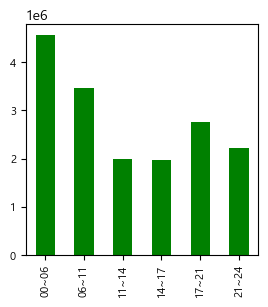

In [60]:
# 길동 시간 별 유동 인구수
road4.loc['길동'].plot.bar(figsize=(3,3), fontsize=8, color='g')
plt.show()

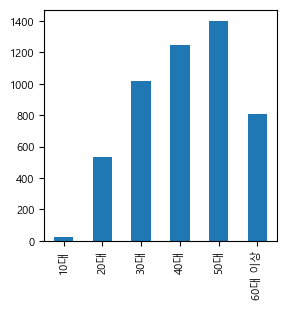

In [61]:
# 화곡1동 연령 별 직장 인구수
worker3.loc['화곡1동'].plot.bar(figsize=(3,3), fontsize=8)
plt.show()

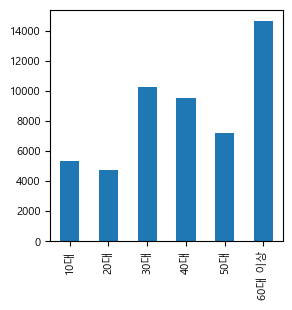

In [62]:
# 화곡1동 연령 별 상주 인구수
home3.loc['화곡1동'].plot.bar(figsize=(3,3), fontsize=8)
plt.show()

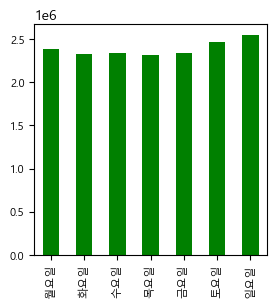

In [63]:
# 화곡1동 요일 별 유동 인구수
road5.loc['화곡1동'].plot.bar(figsize=(3,3), fontsize=8, color='g')
plt.show()

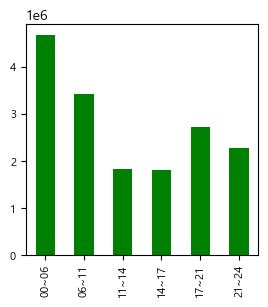

In [64]:
# 화곡1동 시간 별 유동 인구수
road4.loc['화곡1동'].plot.bar(figsize=(3,3), fontsize=8, color='g')
plt.show()

### 인구 데이터 별 TOP5 행정동 매출 금액 및 건수, 점포 수

In [65]:
money.columns

Index(['기준_년분기_코드', '행정동_코드', '행정동_코드_명', '서비스_업종_코드', '서비스_업종_코드_명',
       '당월_매출_금액', '당월_매출_건수', '주중_매출_금액', '주말_매출_금액', '월요일_매출_금액',
       '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
       '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
       '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액',
       '여성_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
       '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', '주중_매출_건수',
       '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수',
       '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수', '시간대_건수~06_매출_건수',
       '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수', '시간대_건수~17_매출_건수',
       '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수', '남성_매출_건수', '여성_매출_건수',
       '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수', '연령대_40_매출_건수',
       '연령대_50_매출_건수', '연령대_60_이상_매출_건수'],
      dtype='object')

In [70]:
money['서비스_업종_코드_명'].unique()

array(['치과의원', '일반의류', '미용실', '핸드폰', '중식음식점', '골프연습장', '운동/경기용품',
       '스포츠 강습', '커피-음료', '네일숍', '문구', '피부관리실', '패스트푸드점', '육류판매', '화초',
       '가구', '호프-간이주점', '화장품', '일반교습학원', '가전제품수리', '안경', '당구장', '서적',
       '한의원', '여관', '신발', '반찬가게', '예술학원', '분식전문점', '미곡판매', '노래방', '조명용품',
       '수산물판매', '슈퍼마켓', '편의점', '시계및귀금속', '일식음식점', '제과점', '스포츠클럽', '청과상',
       '자동차수리', '가전제품', '전자상거래업', 'PC방', '철물점', '섬유제품', '양식음식점', '세탁소',
       '한식음식점', '의약품', '치킨전문점', '인테리어', '의료기기', '일반의원', '애완동물', '외국어학원',
       '자전거 및 기타운송장비', '자동차미용', '부동산중개업', '컴퓨터및주변장치판매', '가방', '완구', '고시원'],
      dtype=object)

In [75]:
# 서비스 업종 중 요식업 관련 업종만 추출
money1 = money[money['서비스_업종_코드_명'].isin(['중식음식점', '패스트푸드점','호프-간이주점','분식전문점', '일식음식점',
                                          '치킨전문점','양식음식점', '한식음식점'])]

In [97]:
# # 분기별로 나뉘어진 매출을 1년치로 합산
group_money = money1.groupby(['행정동_코드_명','서비스_업종_코드_명']).sum()

In [101]:
# 시간별, 연령별, 요일별로 구분하여 추출
moneytime = group_money[['시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
       '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액']]
moneyday = group_money[['월요일_매출_금액','화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
       '일요일_매출_금액']]
moneyage = group_money[['연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
       '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액']]